# ANS 1 B

In [95]:
import numpy as np
x=np.array([1,3,6])
y=np.array([6,10,16])
def graient_descent(x,y):
    mcurr=bcurr=0
    n=len(x)
    iterations = 1000
    learningrate=0.1
    for i in range(0,6):
        print(mcurr,bcurr,i)
        y_predicted= x*mcurr+bcurr
        md= -(2/n)*sum(x*(y-y_predicted))
        bd= -(2/n)*sum(y-y_predicted)
        mcurr=mcurr - md*learningrate
        bcurr=bcurr - bd*learningrate
print("theta1  "+" theta2  "+" ITERATION")
graient_descent(x,y)

theta1   theta2   ITERATION
0 0 0
8.8 2.1333333333333333 1
-10.808888888888891 -2.026666666666667 2
32.48948148148149 7.717925925925927 3
-63.490212345679026 -13.351980246913586 4
148.91442567901237 33.77855736625516 5


# ANS 1 C

In [96]:
xm=sum(x)/len(x)
ym=sum(y)/len(y)
cov=(sum((x-xm)*(y-ym)))/len(x)
var=(sum((x-xm)*(x-xm)))/len(x)
print(cov,var)

8.444444444444445 4.222222222222222


# ANS 2 A

In [97]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit([[1,2], [2, 4], [3, 6],[4,8]], [2,3,4,5])
...                                       
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize=False)
print("co-efficient of the matrix:",model.coef_)
print(model.intercept_)

co-efficient of the matrix: [0.2 0.4]
1.0


# ANS 2 B

In [98]:
X = np.array([[1, 2], [2, 4],[3,6],[4,8]])
Y = np.array([[2],[3],[4],[5]])
xt=X.transpose()
m=np.matmul(xt,X)
y=np.matmul(xt,Y)
np.linalg.inv(m)

LinAlgError: Singular matrix

NOTE -> As in the above matrix two features are linearly dependent so the multiplication matrix is Singular matrix. sklearn doesnot face this problem because it uses LU DECOMPOSITION and LU DECOMPOSITION does not find out inverse of a matrix.

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR 
from sklearn.model_selection import train_test_split 

In [100]:
real = pd.read_csv('realstate.csv')
real.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# ANS 3 (a)

In [101]:
y = real['Y house price of unit area']

In [102]:
X = real[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]

In [103]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

In [105]:
from sklearn.metrics import mean_squared_error
import math
model = LR()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
error = mean_squared_error(y_test,prediction)
print("Root of MSE is :",math.sqrt(error))
x = model.coef_
print("Regression co-efficient of the model :",x)

Root of MSE is : 8.17750587946277
Regression co-efficient of the model : [ 5.47748001e+00 -2.84728946e-01 -5.00601775e-03  1.12467334e+00
  3.16635162e+02 -4.88536620e+01]


# ANS -> B 

We can not say anything about the feature importance just by looking the regression co-efficients, Most of the time the features having high co-efficient will be having more importance but it is not always true. So we can say Feature Importance and Regression co-efficient are no way related to each other.

# ANS C

In [106]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(real[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']])

/home/karan/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/karan/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.70, random_state=42)
model = LR()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
error = mean_squared_error(y_test,prediction)
print("Root of MSE is on the dtandarized data:",math.sqrt(error))
x = model.coef_
print("Regression co-efficient of the model on the standardized data:",x)

Root of MSE is on the dtandarized data: 8.177505879462823
Regression co-efficient of the model on the standardized data: [ 1.54260349 -3.23985015 -6.31050782  3.30879146  3.92475596 -0.74886003]


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
def gredientDescentRegress(X,Y):
    model = LR()
    model.fit(X,Y)
    x = model.coef_
    return x

NOTE -> If we convert the data in the standard form then the feature that is having large linear co-efficient will have more importance as compare to the feature having less value of linear co-efficient. As we have standardized the data.

# ANS D

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
y = real['Y house price of unit area']
df = StandardScaler().fit_transform(real[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']])
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.70, random_state=42)
model = LR()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
error = y_test - prediction
#print(error)
#error = mean_squared_error(y_test,prediction)
#print("Root of MSE is on the dtandarized data:",math.sqrt(error))
x = model.coef_
print("Regression co-efficient of the model on the standardized data:",x)

Regression co-efficient of the model on the standardized data: [ 1.54260349 -3.23985015 -6.31050782  3.30879146  3.92475596 -0.74886003]


/home/karan/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/karan/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


***********
pdf for RSS
[0.00344828 0.         0.01724138 0.11034483 0.34482759 0.33448276
 0.14137931 0.02758621 0.00344828 0.01724138]


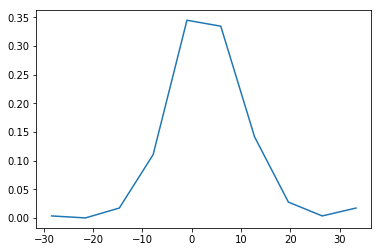

Minimum value of RSS: -35.27987398267957
Maximum value of RSS: 33.30735859793338
***********
CDF for RSS
[0.00344828 0.00344828 0.02068966 0.13103448 0.47586207 0.81034483
 0.95172414 0.97931034 0.98275862 1.        ]


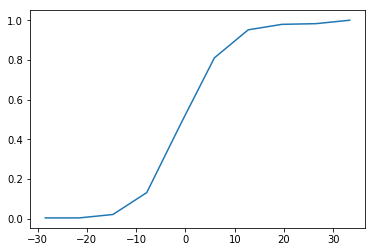

In [110]:
import matplotlib.pyplot as plt
counts, bin_edges = np.histogram(error, bins=10,density = True)
pdf = counts/(sum(counts))
print("***********")
print("pdf for RSS")
print(pdf)
plt.plot(bin_edges[1:],pdf);
plt.show();
print("Minimum value of RSS:",min(error))
print("Maximum value of RSS:",max(error))

counts, bin_edges = np.histogram(error, bins=10,density = True)
cdf = np.cumsum(pdf)
print("***********")
print("CDF for RSS")
print(cdf)
plt.plot(bin_edges[1:],cdf);
plt.show();


NOTE ->  By looking the above cdf and pdf of the residual error, we can say that the residual error is normally distributed.

# ANS E  

In [111]:
import pandas as pd
d = pd.read_csv('realstate1.csv')
d1 = pd.read_csv('xyz.csv')
d.head(5)
d = d.drop(['No'],axis = 1)
d1 = d1.drop(['No'],axis=1)

In [112]:
d.head(5)


,a,b,c,d,e,f,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#df = StandardScaler().fit_transform(d[['a','b','c','d','e','f']])
X_train1, X_test1, y_train1, y_test1 = train_test_split(d[['a','b','c','d','e','f']], d['Y house price of unit area'], test_size=0.20, random_state=42)
col = ['a','b','c','d','e','f']
a = 0
maxa = 10000000000000
optf = [[],[]]
for i in (0,5):
    for j in range(i+1,6):
        c = [col[i],col[j]]
        m = LR()
        m.fit(X_train1[c],y_train1)
        pre = m.predict(X_test1[c])
        acc = mean_squared_error(y_test1,pre)
        if(acc<maxa):
            optf[0] = c
            maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            c = [col[i],col[j],col[k]]
            m = LR()
            m.fit(X_train1[c],y_train1)
            pre = m.predict(X_test1[c])
            acc = mean_squared_error(y_test1,pre)
            print(math.sqrt(acc))
            if(acc<maxa):
                optf[0] = c
                maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                if k == 4:
                    a = acc
                    cl = [col[i],col[j],col[k],col[l]]
                c = [col[i],col[j],col[k],col[l]]
                m = LR()
                m.fit(X_train1[c],y_train1)
                pre = m.predict(X_test1[c])
                acc = math.sqrt(mean_squared_error(y_test1,pre))
                if(acc<maxa):
                    optf[0] = c
                    maxa = acc
print("Max Root Mean squared error:",maxa)
print("columns of the max accuracy:",optf[0])

8.157649604288347
9.583493319738015
9.756161663092065
9.636513918221043
7.989861203449044
8.416676873684835
8.574692661371358
9.039948671917708
8.763208262703342
8.994984954039996
Max Root Mean squared error: 7.4910740283271595
columns of the max accuracy: ['a', 'b', 'c', 'd']


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#df = StandardScaler().fit_transform(d[['a','b','c','d','e','f']])
X_train1, X_test1, y_train1, y_test1 = train_test_split(d1[['b','a','d','e','f','c']], d['Y house price of unit area'], test_size=0.20, random_state=42)
col = ['b','a','d','e','f','c']
a = 0

a = 0
maxa = 10000000000000
optf = [[],[]]
for i in (0,5):
    for j in range(i+1,6):
        c = [col[i],col[j]]
        m = LR()
        m.fit(X_train1[c],y_train1)
        pre = m.predict(X_test1[c])
        acc = mean_squared_error(y_test1,pre)
        if(acc<maxa):
            optf[0] = c
            maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            c = [col[i],col[j],col[k]]
            m = LR()
            m.fit(X_train1[c],y_train1)
            pre = m.predict(X_test1[c])
            acc = mean_squared_error(y_test1,pre)
            print(acc)
            if(acc<maxa):
                optf[0] = c
                maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                if k == 4:
                    a = acc
                    cl = [col[i],col[j],col[k],col[l]]
                c = [col[i],col[j],col[k],col[l]]
                m = LR()
                m.fit(X_train1[c],y_train1)
                pre = m.predict(X_test1[c])
                acc = (mean_squared_error(y_test1,pre))
                if(acc<maxa):
                    optf[0] = c
                    maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                for m in range(l+1,6):
                    c = [col[i],col[j],col[k],col[l]]
                    m = LR()
                    m.fit(X_train1[c],y_train1)
                    pre = m.predict(X_test1[c])
                    acc = (mean_squared_error(y_test1,pre))
                    if(acc<maxa):
                        optf[0] = c
                        maxa = acc
for i in (0,5):
    for j in range(i+1,6):
        for k in range(j+1,6):
            for l in range(k+1,6):
                for m in range(l+1,6):
                        c = [col[i],col[j],col[k],col[l]]
                        m = LR()
                        m.fit(X_train1[c],y_train1)
                        pre = m.predict(X_test1[c])
                        acc = (mean_squared_error(y_test1,pre))
                        if(acc<maxa):
                            optf[0] = c
                            maxa = acc
print("Max Accuracy Error:",optf[0])
print("Optimal columns:",maxa)

66.5472470663458
91.84334420946314
95.18269039638733
92.86240049606788
63.837882050380195
70.84044959602114
73.52535423697582
81.72067199090672
76.79381905551212
80.9097543234059
Max Accuracy Error: ['b', 'a', 'd', 'e']
Optimal columns: 56.1161900978777


# ANS 4 A

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [116]:
def normalEquationRegression(X_train, y_train):  
    print("Length of the train data :",len(X_train))
    print("**************************************************************************")
    X1 = X_train.values      # converting the pandas dataframe into numpy ndarray
    Y1 = y_train.values     # converting the pandas dataframe into numpy ndarray
    X1 = np.c_[np.ones(len(X1)),X1]     # adding one in the matrix to find d+1 weight vector
    theta = np.full((len(X1[0])), 0, dtype=float)   #defining theta with default values as zero 
    d1 = np.dot(X1.T,X1)
    d2 =  np.dot(X1.T,Y1)
    d3 = np.linalg.inv(d1)
    theta = np.dot(d3,d2)
    return theta
def calculateacc(X1,Y1,theta):
    X1 = X1.values
    Y1 = Y1.values
    X2 = np.c_[np.ones(len(X1)),X1]
    prediction = np.dot(X2,theta)
    error = prediction - Y1
    rmse = 0
    for i in range(len(Y1)):
        rmse = rmse + error[i]**2
    return math.sqrt(rmse/len(Y1))
theta = normalEquationRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)

rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)

Length of the train data : 331
**************************************************************************
Co-efficients of the given matrix: [-1.30442326e+04  5.44074191e+00 -2.70791490e-01 -4.75863887e-03
  1.09142527e+00  2.29043055e+02 -2.94925865e+01]
RMSE over the normal data: 7.314753581184572


# ANS B

In [117]:
def gradientDescentRegression(X_train, y_train):  
    print("Length of the train data :",len(X_train))
    print("**************************************************************************")
    X1 = X_train.values      # converting the pandas dataframe into numpy ndarray
    Y1 = y_train.values     # converting the pandas dataframe into numpy ndarray
    X1 = np.c_[np.ones(len(X1)),X1]     # adding one in the matrix to find d+1 weight vector
    theta = np.full((len(X1[0])), 0, dtype=float)   #defining theta with default values as zero 
    d1 = np.dot(X1.T,X1)
    d2 =  np.dot(X1.T,Y1)
    d3 = np.linalg.inv(d1)
    m = len(Y1)
    learning_rate = .1
    theta = np.dot(d3,d2)
    opt_theta = theta
    prev_error = 0
    for i in range(0,100):
        prediction = np.dot(X1,theta)
        theta = theta -(1/m)*learning_rate*( X1.T.dot((prediction - Y1)))
        rmse = calculateacc(X_train,y_train,theta)
        if(prev_error > rmse or prev_error==0):
            prev_error = rmse
            opt_theta = theta
    return opt_theta
def calculateacc(X1,Y1,theta):
    X1 = X1.values
    Y1 = Y1.values
    X2 = np.c_[np.ones(len(X1)),X1]
    prediction = np.dot(X2,theta)
    error = prediction - Y1
    rmse = 0
    for i in range(len(Y1)):
        rmse = rmse + error[i]**2
    return math.sqrt(rmse/len(Y1))
theta = gradientDescentRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)

Length of the train data : 331
**************************************************************************
Co-efficients of the given matrix: [-1.30442326e+04  5.44144957e+00 -2.70785413e-01 -4.38615910e-03
  1.09142673e+00  2.29043064e+02 -2.94925437e+01]
RMSE over the normal data: 7.514227042558266


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars


# ANS 4 C

In [118]:
import autograd.numpy as np 
from autograd import grad   
from autograd import jacobian
def gradientDescentAutogradRegression1(X, y, alpha = 0.1):
    past_costs = []
    theta = np.random.rand(X.shape[1])
    past_thetas = [theta]
    m = y.size
    prediction = np.dot(X, theta)
    error = prediction - y
    cost = 1/(2*m) * np.dot(error.T, error)
    past_costs.append(cost)
    theta = theta -(alpha * (1/m)  * np.dot(X.T, error.T))
    past_thetas.append(theta)
    return np.array(past_thetas)
autograd=jacobian(gradientDescentAutogradRegression1(X_train,y_train))

In [119]:
from autograd import grad
def gradientDescentAutogradRegression(X_train, y_train):  
    print("Length of the train data :",len(X_train))
    print("**************************************************************************")
    X1 = X_train.values      # converting the pandas dataframe into numpy ndarray
    Y1 = y_train.values     # converting the pandas dataframe into numpy ndarray
    X1 = np.c_[np.ones(len(X1)),X1]     # adding one in the matrix to find d+1 weight vector
    theta = np.full((len(X1[0])), 4, dtype=float)   #defining theta with default values as zero 
    d1 = np.dot(X1.T,X1)
    d2 =  np.dot(X1.T,Y1)
    d3 = np.linalg.inv(d1)
    m = len(Y1)
    autograd=jacobian(gradientDescentAutogradRegression1(X_train,y_train))
    learning_rate = .1
    theta = np.dot(d3,d2)
    opt_theta = theta
    prev_error = 0
    for i in range(0,100):
        prediction = np.dot(X1,theta)
        theta = theta -(1/m)*learning_rate*( X1.T.dot((prediction - Y1)))
        rmse = calculateacc(X_train,y_train,theta)
        if(prev_error > rmse or prev_error==0):
            prev_error = rmse
            opt_theta = theta
    return opt_theta
def calculateacc(X1,Y1,theta):
    X1 = X1.values
    Y1 = Y1.values
    X2 = np.c_[np.ones(len(X1)),X1]
    prediction = np.dot(X2,theta)
    error = prediction - Y1
    rmse = 0
    for i in range(len(Y1)):
        rmse = rmse + error[i]**2
    return math.sqrt(rmse/len(Y1))

In [120]:
theta = gradientDescentAutogradRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)

Length of the train data : 331
**************************************************************************
Co-efficients of the given matrix: [-1.30442326e+04  5.44144957e+00 -2.70785413e-01 -4.38615910e-03
  1.09142673e+00  2.29043064e+02 -2.94925437e+01]
RMSE over the normal data: 7.514227042558266


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars


# ANS d

In [130]:
from autograd import grad
def gradientDescentPyTorchRegression(X_train, y_train):  
    print("Length of the train data :",len(X_train))
    print("**************************************************************************")
    X1 = X_train.values      # converting the pandas dataframe into numpy ndarray
    Y1 = y_train.values     # converting the pandas dataframe into numpy ndarray
    X1 = np.c_[np.ones(len(X1)),X1]     # adding one in the matrix to find d+1 weight vector
    theta = np.full((len(X1[0])), 4, dtype=float)   #defining theta with default values as zero 
    d1 = np.dot(X1.T,X1)
    d2 =  np.dot(X1.T,Y1)
    d3 = np.linalg.inv(d1)
    #d5 = np.dot(X1,X2)    
    m = len(Y1)
    autograd=jacobian(gradientDescentAutogradRegression1(X_train,y_train))
    learning_rate = .1
    theta = np.dot(d3,d2)
    opt_theta = theta
    prev_error = 0
    for i in range(0,100):
        prediction = np.dot(X1,theta)
        theta = theta -(1/m)*learning_rate*( X1.T.dot((prediction - Y1)))
        rmse = calculateacc(X_train,y_train,theta)
        if(prev_error > rmse or prev_error==0):
            prev_error = rmse
            opt_theta = theta
    return opt_theta
def calculateacc(X1,Y1,theta):
    X1 = X1.values
    Y1 = Y1.values
    X2 = np.c_[np.ones(len(X1)),X1]
    prediction = np.dot(X2,theta)
    error = prediction - Y1
    rmse = 0
    for i in range(len(Y1)):
        rmse = rmse + error[i]**2
    return math.sqrt(rmse/len(Y1))

In [ ]:
import torch
def gradientDescentPyTorchRegression1(X, y, alpha = 0.1):
    torch.manual_seed(0)
    N = 100
    x = torch.rand(N,1)*5
    y = 2.3 + 5.1*x
    y_obs = y + 0.2*torch.randn(N,1)

    w = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    gamma = 0.01
    for i in range(500):
        print(i)
        y_pred = w * x + b
        mse = torch.mean((y_pred - y_obs) ** 2)

    # backward
        mse.backward()
        print('slope  :', w)
        print('Bias:', b)
        print('slope.grad:', w.grad)
        print('Bias.grad:', b.grad)

        with torch.no_grad():
            w = w - gamma * w.grad
            b = b - gamma * b.grad
        w.requires_grad = True
        b.requires_grad = True

In [131]:
import time
t1 = time.time()
theta = gradientDescentPyTorchRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)
t2 = time.time()
print(t2-t1)

Length of the train data : 331
**************************************************************************
Co-efficients of the given matrix: [-1.30442326e+04  5.44144957e+00 -2.70785413e-01 -4.38615910e-03
  1.09142673e+00  2.29043064e+02 -2.94925437e+01]
RMSE over the normal data: 7.514227042558266
0.3181428909301758


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars


# ANS e

In [132]:
# Nomral regressor
import time
t1 = time.time()
theta = normalEquationRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)
t2 = time.time()
print("time taken by noraml regressor",t2-t1)

Length of the train data : 331
**************************************************************************
Co-efficients of the given matrix: [-1.30442326e+04  5.44074191e+00 -2.70791490e-01 -4.75863887e-03
  1.09142527e+00  2.29043055e+02 -2.94925865e+01]
RMSE over the normal data: 7.314753581184572
time taken by noraml regressor 0.010018348693847656


In [133]:
#gradient descent regression
t1 = time.time()
theta = gradientDescentRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)
t2 = time.time()
print("time taken by gradient descent regressor",t2-t1)

Length of the train data : 331
**************************************************************************
Co-efficients of the given matrix: [-1.30442326e+04  5.44144957e+00 -2.70785413e-01 -4.38615910e-03
  1.09142673e+00  2.29043064e+02 -2.94925437e+01]
RMSE over the normal data: 7.514227042558266
time taken by gradient descent regressor 0.3437004089355469


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars


In [134]:
# gradient descent autoregressor
t1 = time.time()
theta = gradientDescentAutogradRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)
t2 = time.time()
print("time taken by the auto regressor",t2-t1)

Length of the train data : 331
**************************************************************************


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars


Co-efficients of the given matrix: [-1.30442326e+04  5.44144957e+00 -2.70785413e-01 -4.38615910e-03
  1.09142673e+00  2.29043064e+02 -2.94925437e+01]
RMSE over the normal data: 7.514227042558266
time taken by the auto regressor 0.32257986068725586


In [135]:
#pytorch regressor
import time
t1 = time.time()
theta = gradientDescentPyTorchRegression(X_train, y_train)    
print("Co-efficients of the given matrix:",theta)
rmse = calculateacc(X_test,y_test,theta)
print("RMSE over the normal data:",rmse)
t2 = time.time()
print(t2-t1)

Length of the train data : 331
**************************************************************************


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars


Co-efficients of the given matrix: [-1.30442326e+04  5.44144957e+00 -2.70785413e-01 -4.38615910e-03
  1.09142673e+00  2.29043064e+02 -2.94925437e+01]
RMSE over the normal data: 7.514227042558266
0.307004451751709


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
t1 = time.time()
model = LR()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
error = mean_squared_error(y_test,prediction)
t2 = time.time()
print("Root of MSE is :",math.sqrt(error))
x = model.coef_
print("Regression co-efficient of the model :",x)
print("time taken by the sklearn",t2-t1)

Root of MSE is : 7.314753524522053
Regression co-efficient of the model : [ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
  2.29043054e+02 -2.94925908e+01]
time taken by the sklearn 0.009322166442871094


# ANS 5

In [136]:
# for p = 5
import numpy as np
import pandas as pd
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5+np.random.randn(len(x))*1e5
x_z = np.ndarray(shape=(201,5), dtype=float, order='F')
#print(len(y))
for i in range(0,len(x)):
    x_z[i] = ([x[i]**5,x[i]**4,x[i]**3,x[i]**2,x[i]**1])
dx = pd.DataFrame(x_z)
dy = pd.DataFrame(y)
theta = gradientDescentRegression(dx,dy)    
print("Co-efficients of the given matrix by using gredient descent:",theta)
theta = gredientDescentRegress(dx,dy)    
print("Co-efficients of the given matrix by using sklearn:",theta)

Length of the train data : 201
**************************************************************************


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square


Co-efficients of the given matrix by using gredient descent: [[ 8.82345691e+03]
 [ 2.01272748e+00]
 [-9.48484475e+01]
 [ 7.53754389e+02]
 [ 3.57964539e+03]
 [-5.75536518e+04]]
Co-efficients of the given matrix by using sklearn: [[ 3.65204554e+00 -9.47499055e+01  7.53760679e+02  3.57964584e+03
  -5.75536517e+04]]


In [137]:
# for degree 4
import numpy as np
import pandas as pd
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y =  3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5+np.random.randn(len(x))*1e5
x_z = np.ndarray(shape=(201,4), dtype=float, order='F')
#print(len(y))
for i in range(0,len(x)):
    x_z[i] = ([x[i]**4,x[i]**3,x[i]**2,x[i]**1])
dx = pd.DataFrame(x_z)
dy = pd.DataFrame(y)
theta = gradientDescentRegression(dx,dy)    
print("Co-efficients of the given matrix using gredient:",theta)
theta = gredientDescentRegress(dx,dy)    
print("Co-efficients of the given matrix by using sklearn:",theta)

Length of the train data : 201
**************************************************************************


/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in add
/home/karan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square


Co-efficients of the given matrix using gredient: [[ 4.08456444e+04]
 [ 3.78530769e+01]
 [-1.60071059e+03]
 [ 2.11728739e+04]
 [-1.07322843e+05]]
Co-efficients of the given matrix by using sklearn: [[ 3.78523715e+01 -1.60071062e+03  2.11728739e+04 -1.07322843e+05]]


# ANS 6 A

Text(0.5, 0, '$RSS$')

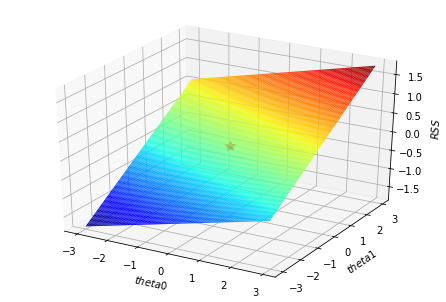

In [139]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

def func_z(x, y):
    # Calculate values of Z from the created grid
    z = .2*x + .4*y

    return z

''' Plot our function '''
a = np.arange(-3, 3, 0.05)
b = np.arange(-3, 3, 0.05)

theta0, theta1 = np.meshgrid(a, b)
RSS = func_z(theta0, theta1)

fig1 = plt.figure()
ax1 = Axes3D(fig1)
surf = ax1.plot_surface(theta0, theta1, RSS, edgecolor='none', rstride=1,
                        cstride=1, cmap='jet')

# Plot target (the minimum of the function)
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, func_z(*min_point_), 'r*', markersize=10)

ax1.set_xlabel(r'$theta0$')
ax1.set_ylabel(r'$theta1$')
ax1.set_zlabel(r'$RSS$')

# ANS 6 B

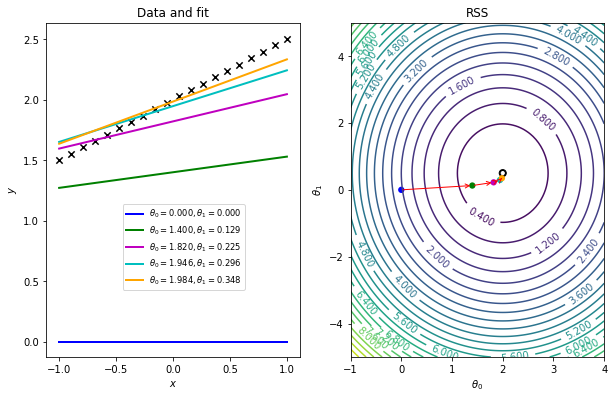

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('RSS')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')
time.sleep(2) 
plt.show()